<a href="https://www.kaggle.com/code/wuttipats/lazada-health-products-eda?scriptVersionId=140079748" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
'''
Vertify what environment are running
'''
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    path='/kaggle/input/lazada-thailand-health-products-dataset'
else:
    path="{}".format(os.getcwd())

# Import a Dataset

First, we'll load the data and inspect the first few rows to get an idea of what information is included.

In [3]:
data = pd.read_csv(os.path.join(path, 'health_and_wellness_cleaned_20230810_213000.csv'))
data.head()

,Id,Section,Name,Price,Total Sold,Total Reviews,Shop Location
0,4799179886,Acne Care,DHC Vitamin B-Mix วิตามินบีรวม (สำหรับ 20 วัน),฿75.00,NaN,NaN,Pathum Thani
1,4795171651,Acne Care,ซิงค์ Vistra Zinc วิสทร้า ซิงค์ 15 มก. ขนาด 20...,฿79.00,NaN,NaN,Chiang Mai
2,4790242641,Acne Care,Blackmores แบลคมอร์ส Bio Zinc A Chelate (90 T...,฿224.00,NaN,NaN,Surin
3,4789940606,Acne Care,1แถม1 กลูต้าวิตมี กลูต้าส้มเลือด Gluta With Me...,฿290.00,NaN,NaN,Udon Thani
4,4787161067,Acne Care,🎌 DHC Vitamin B-Mix Persistent วิตามินบีรวม แบ...,฿149.00,NaN,NaN,Bangkok


In [4]:
# Summary of DataFrame 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68499 entries, 0 to 68498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             68499 non-null  int64 
 1   Section        68499 non-null  object
 2   Name           68499 non-null  object
 3   Price          68499 non-null  object
 4   Total Sold     36702 non-null  object
 5   Total Reviews  40952 non-null  object
 6   Shop Location  68430 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.7+ MB


In [5]:
# Summary statistics for numerical and categorical columns
data.describe(include='all')


,Id,Section,Name,Price,Total Sold,Total Reviews,Shop Location
count,6.849900e+04,68499,68499,68499,36702,40952,68430
unique,NaN,30,2379,638,675,419,71
top,NaN,Skin Nourishment,(ของแท้ถูกที่สุด) หมดอายุ 14/12/2024 Ensure เอ...,฿290.00,"9,999+ ชิ้น",(1),Bangkok
freq,NaN,4160,180,1473,1460,7273,30225
mean,4.128242e+09,NaN,NaN,NaN,NaN,NaN,NaN
std,1.168340e+09,NaN,NaN,NaN,NaN,NaN,NaN
min,7.773600e+04,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.108730e+09,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.766743e+09,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.790225e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking for number of unique values across columns
data.nunique()

Id               2497
Section            30
Name             2379
Price             638
Total Sold        675
Total Reviews     419
Shop Location      71
dtype: int64

In [7]:
# Checking for missing values
data.isnull().sum()

Id                   0
Section              0
Name                 0
Price                0
Total Sold       31797
Total Reviews    27547
Shop Location       69
dtype: int64

In [8]:
# Checking for duplication values
duplicated = data.duplicated()
display(data[duplicated]['Section'].value_counts())

display(data[duplicated].sort_values('Id').head())

Skin Nourishment                 4023
Immunity                         3995
Well Being Gifts & Value Sets    3987
Multivitamins                    3958
Herbs & Traditional Medicine     3918
Digestive Care                   3867
Bone & Joint Support             3866
Slimming Beverages               3758
Protein                          3191
Whitening                        3116
Brain & Memory                   2959
Nutritional Foods & Drinks       2838
Appetite Suppressant             2355
Women's Health                   2158
Men's Health                     2119
Heart & Blood Pressure           2038
Weight Management Value Sets     1958
Detoxification                   1648
Fat Blockers & Burners           1622
Beauty Supplements Value Sets    1393
Pregnancy Care                   1192
Food Supplement                   988
Sexual Health Vitamins            875
Pre-Workout                       820
Hair & Nail                       721
Acne Care                         678
Mass Gainer 

,Id,Section,Name,Price,Total Sold,Total Reviews,Shop Location
18232,77736,Multivitamins,VISTRA Zinc 15mg ( 45 caps) - วิสทร้า ซิงก์ 1...,฿204.00,"9,999+ ชิ้น",(7216),Chachoengsao
17152,77736,Multivitamins,VISTRA Zinc 15mg ( 45 caps) - วิสทร้า ซิงก์ 1...,฿204.00,"9,999+ ชิ้น",(7216),Chachoengsao
17552,77736,Multivitamins,VISTRA Zinc 15mg ( 45 caps) - วิสทร้า ซิงก์ 1...,฿204.00,"9,999+ ชิ้น",(7216),Chachoengsao
17232,77736,Multivitamins,VISTRA Zinc 15mg ( 45 caps) - วิสทร้า ซิงก์ 1...,฿204.00,"9,999+ ชิ้น",(7216),Chachoengsao
16832,77736,Multivitamins,VISTRA Zinc 15mg ( 45 caps) - วิสทร้า ซิงก์ 1...,฿204.00,"9,999+ ชิ้น",(7216),Chachoengsao


After initail analyse these is what we found
- **Id**: There are 2497 unique product IDs in the dataset. Duplication in product listings could be due to multiple reasons such as different sellers selling the same product.
- **Section**: The products are distributed across 30 different sections, with "Skin Nourishment" being the most frequent.
- **Name**: There are 2,379 unique product names, with some products having the same name, it suggests that some products might be listed under different sections or by different sellers.
- **Price**: 638 unique price points, with the price "฿290.00" being the most common.
- **Total Sold**: This column has 31,797 missing values, while maximum is 9999+ for the number of items sold.
- **Total Reviews**: This column has 27,547 missing values.
- **Shop Location**: The products are sold from 71 unique locations, with "Bangkok" being the most frequent. There are 69 missing values in this column.

# Data Cleaning:
- Fill or handle **missing values** for "Total Sold," "Total Reviews," and "Shop Location."
- Romeve **duplicated values** by keep only first value of duplicates.
- Convert the **"Price"** column to a numerical data type by removing the currency symbol.
- Handle the **"Total Sold"** column by converting it to numerical values, possibly replacing the "+" symbol.
- Convert the **"Total Reviews"** column to numerical values.


Now, let's handle the **missing values**. For the purpose of this EDA, we can fill the missing values with reasonable substitutes:

- For "Total Sold" and "Total Reviews," we can fill missing values with 0, assuming that missing values may indicate no sales or reviews.
- For "Shop Location," we can fill missing values with a placeholder like "Unknown."

In [9]:
# Filling missing values for "Total Sold" and "Total Reviews" with 0
data['Total Sold'].fillna(0, inplace=True)
data['Total Reviews'].fillna(0, inplace=True)

# Filling missing values for "Shop Location" with "Unknown"
data['Shop Location'].fillna('Unknown', inplace=True)

# Checking if there are any missing values left
data.isnull().sum()


Id               0
Section          0
Name             0
Price            0
Total Sold       0
Total Reviews    0
Shop Location    0
dtype: int64

Next, let's handle the **duplicated values** in the dataset. Given that the 'Id' column is intended to be a unique identifier for each product, we shouldn't have any duplicate values in it.
- Drop duplicate rows based on the 'Id' column.
- Keep only the first occurrence of any duplicated product 'Id' and remove subsequent repeats.

In [10]:
# Remove duplicated rows by keeping first of duplicates valuse
data = data.drop_duplicates(subset=['Id'], keep='first')

# Checking if there are any duplicated values left
data.duplicated().sum()

0

The **'Price'** column currently contains the Thai Baht currency symbol (฿) along with the actual price value. For efficient numerical analysis and computations, it's essential to have this column as a pure numerical data type.
- We'll remove the currency symbol (฿) and any commas from the 'Price' column.
- Convert the cleaned 'Price' values into a float data type.

In [11]:
# Converting the "Price" column to a numerical data type by removing the currency symbol
data['Price'] = data['Price'].replace('[\฿,]', '', regex=True).astype(float)

# Displaying the first few rows to verify the changes
data.head()


,Id,Section,Name,Price,Total Sold,Total Reviews,Shop Location
0,4799179886,Acne Care,DHC Vitamin B-Mix วิตามินบีรวม (สำหรับ 20 วัน),75.0,0,0,Pathum Thani
1,4795171651,Acne Care,ซิงค์ Vistra Zinc วิสทร้า ซิงค์ 15 มก. ขนาด 20...,79.0,0,0,Chiang Mai
2,4790242641,Acne Care,Blackmores แบลคมอร์ส Bio Zinc A Chelate (90 T...,224.0,0,0,Surin
3,4789940606,Acne Care,1แถม1 กลูต้าวิตมี กลูต้าส้มเลือด Gluta With Me...,290.0,0,0,Udon Thani
4,4787161067,Acne Care,🎌 DHC Vitamin B-Mix Persistent วิตามินบีรวม แบ...,149.0,0,0,Bangkok


Next, we'll focus on the **"Total Sold"** column. Since it seems to contain text values like "9,999+ ชิ้น," we need to extract the numerical part and handle the "+" symbol.

In [12]:
# Checking the unique values in the "Total Sold" column
total_sold_unique_values = data['Total Sold'].dropna().unique()
total_sold_unique_values[:10] # Displaying the first 10 unique values

array([0, '7 ชิ้น', '6 ชิ้น', '18 ชิ้น', '5 ชิ้น', '4,819 ชิ้น',
       '152 ชิ้น', '271 ชิ้น', '25 ชิ้น', '13 ชิ้น'], dtype=object)

It seems that the "Total Sold" column contains the number of units sold followed by the Thai word for "piece" ("ชิ้น"). We can extract the numerical part and convert it to an integer.

Let's proceed with cleaning the "Total Sold" column.

In [13]:
# Converting the "Total Sold" column to numerical values by extracting the numerical part
data['Total Sold'] = data['Total Sold'].replace('[^0-9]+', '', regex=True).astype(float)

In [14]:
data.head()

,Id,Section,Name,Price,Total Sold,Total Reviews,Shop Location
0,4799179886,Acne Care,DHC Vitamin B-Mix วิตามินบีรวม (สำหรับ 20 วัน),75.0,0.0,0,Pathum Thani
1,4795171651,Acne Care,ซิงค์ Vistra Zinc วิสทร้า ซิงค์ 15 มก. ขนาด 20...,79.0,0.0,0,Chiang Mai
2,4790242641,Acne Care,Blackmores แบลคมอร์ส Bio Zinc A Chelate (90 T...,224.0,0.0,0,Surin
3,4789940606,Acne Care,1แถม1 กลูต้าวิตมี กลูต้าส้มเลือด Gluta With Me...,290.0,0.0,0,Udon Thani
4,4787161067,Acne Care,🎌 DHC Vitamin B-Mix Persistent วิตามินบีรวม แบ...,149.0,0.0,0,Bangkok


Also handle the **"Total Reviews"** column in the same manner.

In [15]:
# Displaying the unique values in the "Total Reviews" column to understand its structure
total_reviews_unique_values = data['Total Reviews'].dropna().unique()
total_reviews_unique_values[:10] # Displaying the first 10 unique values

array([0, '(2)', '(1)', '(5)', '(952)', '(4)', '(60)', '(61)', '(7)',
       '(3)'], dtype=object)

It looks like the "Total Reviews" column contains numerical values enclosed in parentheses. We can remove the parentheses and convert the values to integers.

In [16]:
# Converting the "Total Reviews" column to numerical values by removing the parentheses
data['Total Reviews'] = data['Total Reviews'].replace('[\(\)]', '', regex=True).astype(float)

# Displaying the first few rows to verify the changes
data.sample(5)


,Id,Section,Name,Price,Total Sold,Total Reviews,Shop Location
62449,3241731447,Detoxification,เพรียว คลอโรฟิลล์ (แพ็ค48ซอง) จากต้นอ่อนข้าวสา...,186.0,3401.0,535.0,Bangkok
6522,4791485799,Skin Nourishment,✅พร้อมส่ง ถูกที่สุด ของแท้จากญี่ปุ่น ERATH Ots...,479.0,0.0,0.0,Bangkok
47985,4705916001,Hair & Nail,Biotin Zinc ไบโอทิน ซิงก์ 90 เม็ด (ขวด PET แ...,279.0,0.0,0.0,Bangkok
2475,4770548450,Well Being Gifts & Value Sets,กวาวเครือแดง กวาวเครือแดงอัดเม็ด กวาวเครือแดงแ...,220.0,13.0,3.0,Bangkok
51628,4026364277,Heart & Blood Pressure,Clover Plus Cordy US คอร์ดี้ ยูเอส อาหารเสริมส...,60.0,670.0,72.0,Bangkok


In [17]:
'''
# Save cleaned dataframe 

from datetime import datetime

# Generate current timestamp
current_timestamp = datetime.now()
time_format = "%Y-%m-%d_%H-%M-%S"
timestamp = datetime.strftime(current_timestamp, time_format)

# Create file name
file_name = f'lazada-health-products-analysis-cleaned-{timestamp}.csv'

# Save dataframe to .csv file
print(file_name)
data.to_csv(file_name, index=False)
'''

'\n# Save cleaned dataframe \n\nfrom datetime import datetime\n\n# Generate current timestamp\ncurrent_timestamp = datetime.now()\ntime_format = "%Y-%m-%d_%H-%M-%S"\ntimestamp = datetime.strftime(current_timestamp, time_format)\n\n# Create file name\nfile_name = f\'lazada-health-products-analysis-cleaned-{timestamp}.csv\'\n\n# Save dataframe to .csv file\nprint(file_name)\ndata.to_csv(file_name, index=False)\n'

# Exploratory data analysis

Let's proceed with the exploratory data analysis by focusing on the following aspects:

- Distribution of products across different sections.
- Price distribution and statistics.
- Top locations for shops.
- Relationship between total sold, total reviews, and price.

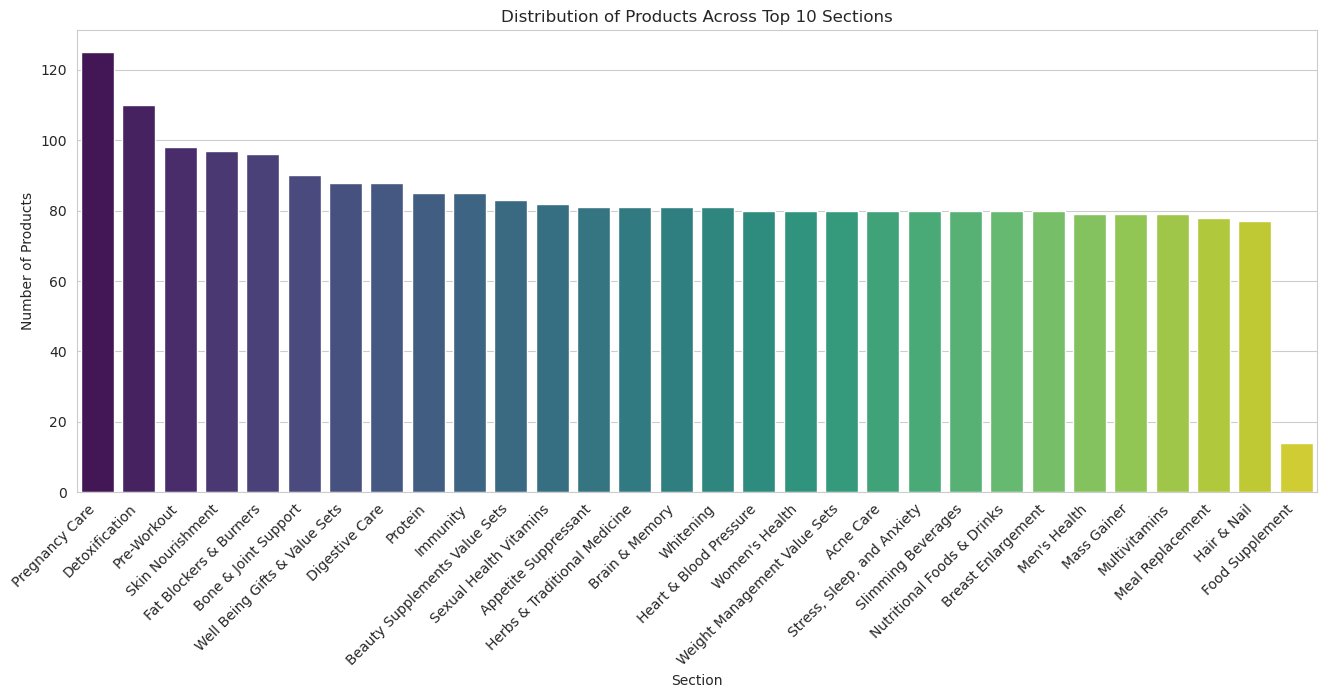

In [18]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set_style("whitegrid")

# Plotting the distribution of products across different sections (top 10 sections)
plt.figure(figsize=(16, 6))
section_counts = data['Section'].value_counts()
sns.barplot(x=section_counts.index, y=section_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Products Across Top 10 Sections')
plt.xlabel('Section')
plt.ylabel('Number of Products')
plt.show()


The bar plot above shows the distribution of products across the 30 sections within the health and wellness category on Lazada. Some sections have a higher number of products, indicating popular categories within the platform.

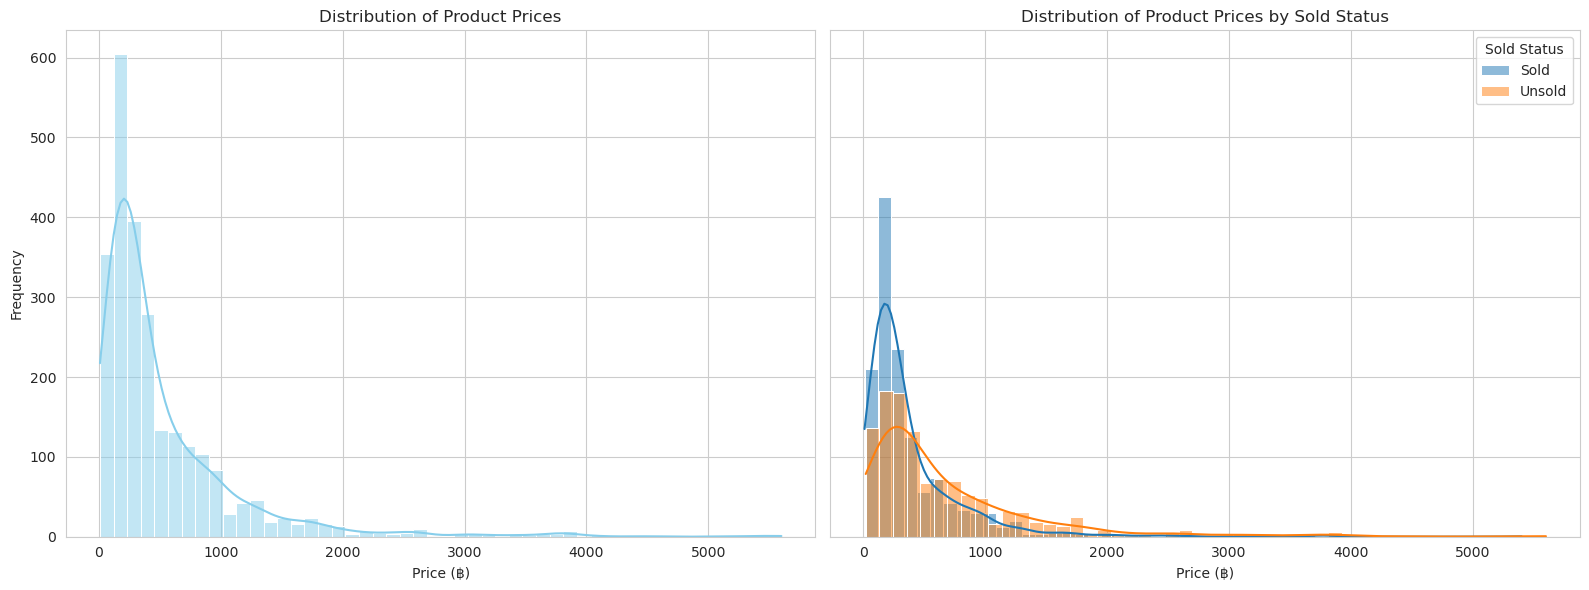

In [19]:
# Creating a new column "Sold Status" based on the "Total Sold" column
data['Sold Status'] = data['Total Sold'].apply(lambda x: 'Sold' if x > 0 else 'Unsold')

# Creating 1x2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Plotting the distribution of product prices without 'Sold Status'
sns.histplot(data['Price'], bins=50, color='skyblue', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Product Prices')
axes[0].set_xlabel('Price (฿)')
axes[0].set_ylabel('Frequency')



# Plotting the distribution of product prices for each 'Sold Status'
for status in ['Sold', 'Unsold']:
    subset = data[data['Sold Status'] == status]
    sns.histplot(subset['Price'], bins=50, label=status, kde=True, ax=axes[1])
    
axes[1].set_title('Distribution of Product Prices by Sold Status')
axes[1].set_xlabel('Price (฿)')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Sold Status')

plt.tight_layout()
plt.show()



The histogram illustrates the distribution of product prices within the health and wellness category. 
- Most products are priced in the lower range, with a few more expensive items creating a long tail on the right side of the distribution.
- For products priced lower than 500 bant, there is a significant number of items that have been sold compared to those that remain unsold.

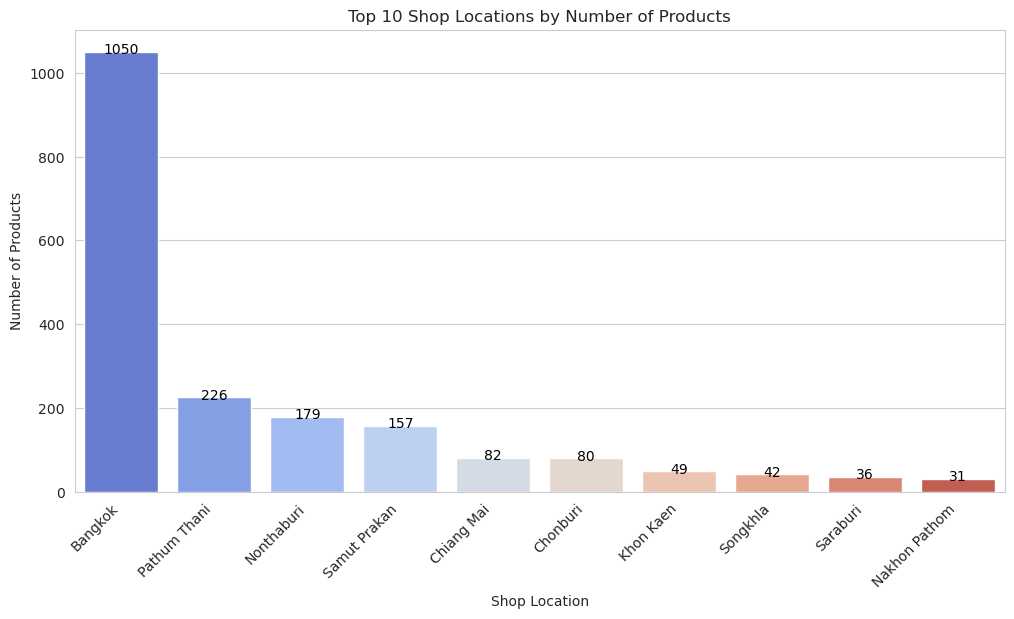

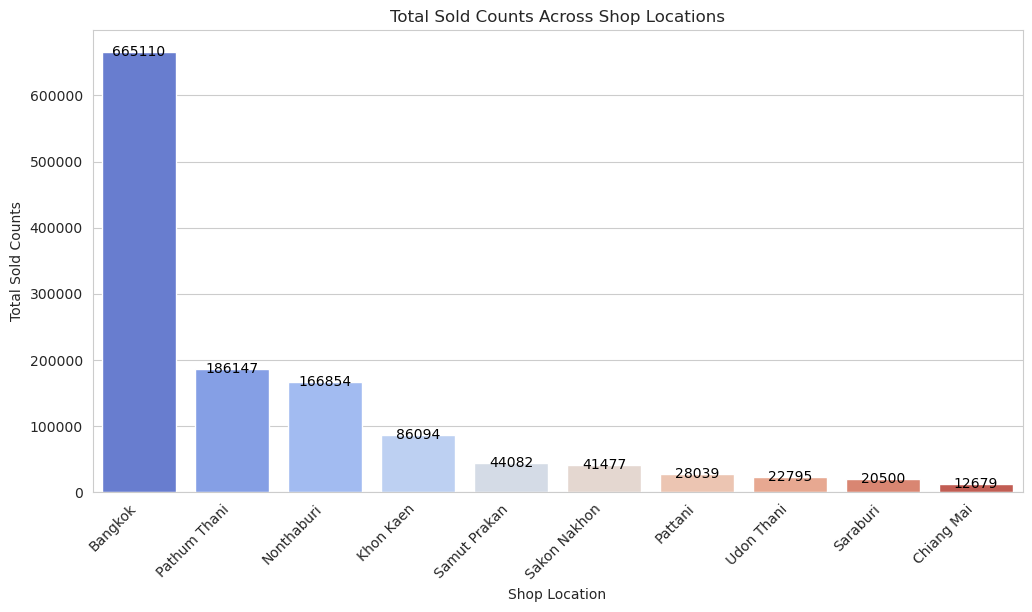

In [20]:
# Plotting the top 10 shop locations by number of products
plt.figure(figsize=(12, 6))
shop_location_counts = data['Shop Location'].value_counts().nlargest(10)
ax = sns.barplot(x=shop_location_counts.index, y=shop_location_counts.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Shop Locations by Number of Products')
plt.xlabel('Shop Location')
plt.ylabel('Number of Products')

# Adding number of products above each bar
for index, value in enumerate(shop_location_counts.values):
    ax.text(index, value + 5, str(value), ha='center', va='center', fontsize=10, color='black')

plt.show()



# Calculating the total sold counts for each shop location
total_sold_counts = data.groupby('Shop Location')['Total Sold'].sum()

# Sorting values for better visualization
total_sold_counts_sorted = total_sold_counts.sort_values(ascending=False)

# Plotting the total sold counts for each shop location using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=total_sold_counts_sorted.index[:10], 
                 y=total_sold_counts_sorted.values[:10], 
                 palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Total Sold Counts Across Shop Locations')
plt.xlabel('Shop Location')
plt.ylabel('Total Sold Counts')

# Adding "Total Sold Counts" above each bar
for index, value in enumerate(total_sold_counts_sorted.values[:10]):
    ax.text(index, value + 5, str(int(value)), ha='center', va='center', fontsize=10, color='black')

plt.show()



The bar plot shows the top 10 shop locations by the **number of products** listed in the health and wellness category on Lazada. "Bangkok" appears to be the dominant location, with a significantly higher number of products compared to other locations.

- Bangkok records the highest total sales count, highlighting its prominence in the health and wellness market on Lazada.
- After Bangkok, locations like "Nonthaburi", "Pathum Thani", and "Khon Kaen" register significant sales volumes, while other locations exhibit varied sales counts.

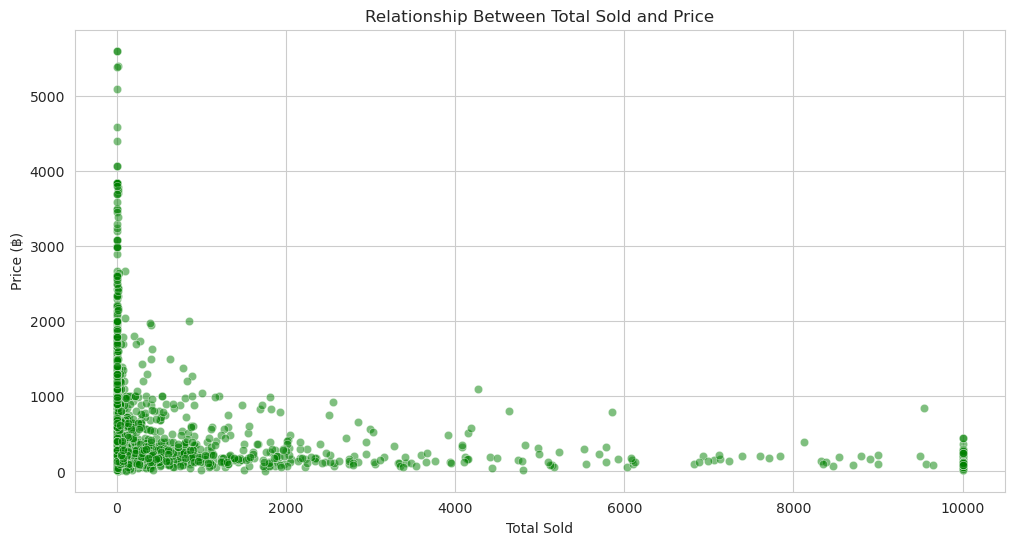

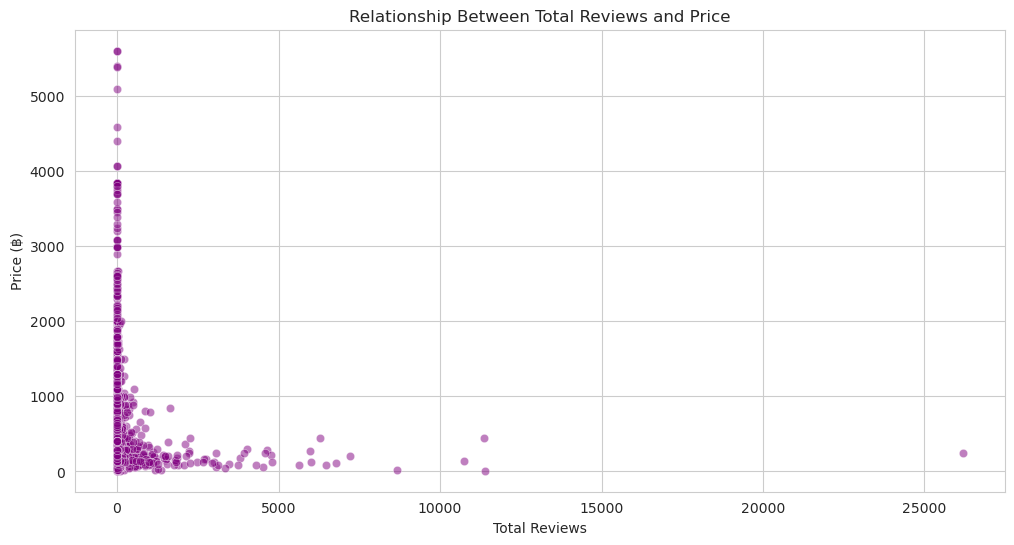

In [21]:
# Plotting scatter plots to visualize the relationship between total sold, total reviews, and price

# Relationship between Total Sold and Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total Sold', y='Price', data=data, color='green', alpha=0.5)
plt.title('Relationship Between Total Sold and Price')
plt.xlabel('Total Sold')
plt.ylabel('Price (฿)')
plt.show()

# Relationship between Total Reviews and Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total Reviews', y='Price', data=data, color='purple', alpha=0.5)
plt.title('Relationship Between Total Reviews and Price')
plt.xlabel('Total Reviews')
plt.ylabel('Price (฿)')
plt.show()


The scatter plots depict the relationships between **"Total Sold" and "Price"** as well as **"Total Reviews" and "Price"**

Total Sold vs. Price: Most products with lower prices have a higher number of sales. There are exceptions, but the trend indicates that affordability might drive sales volume.
Total Reviews vs. Price: Similar to sales, the number of reviews tends to be higher for lower-priced products. Reviews often correlate with sales, so this pattern is consistent with the previous observation.

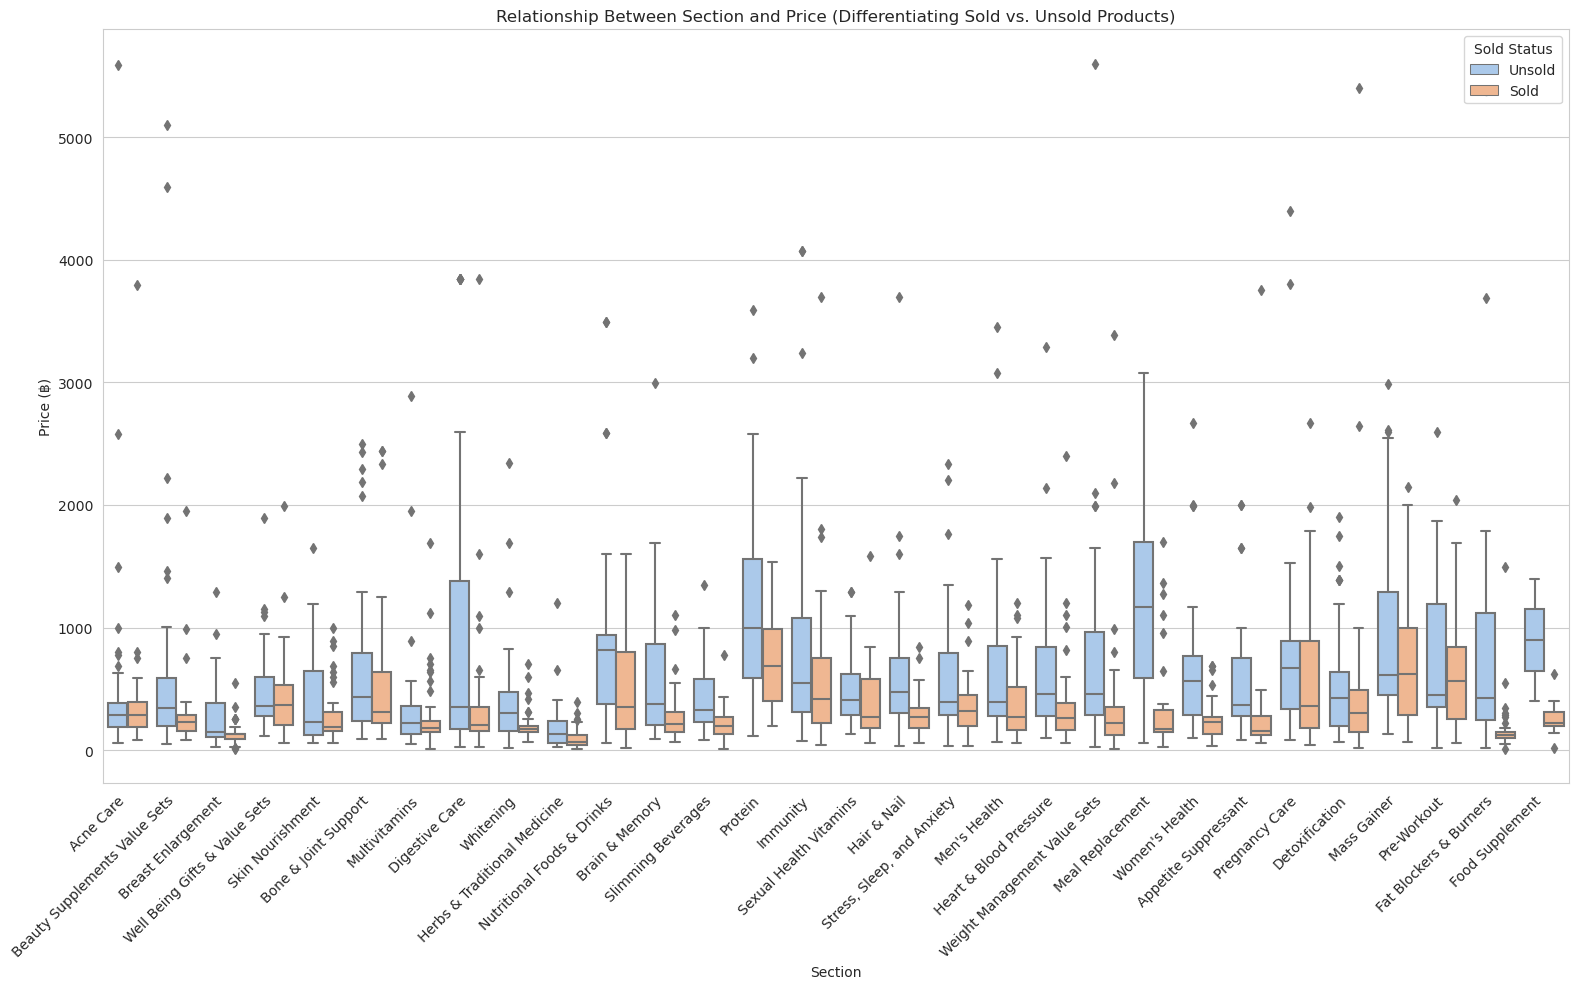

In [22]:
# Creating a new column "Sold Status" based on the "Total Sold" column
data['Sold Status'] = data['Total Sold'].apply(lambda x: 'Sold' if x > 0 else 'Unsold')

# Plotting side-by-side boxplots for each section, differentiating between sold and unsold products
plt.figure(figsize=(16, 10))
sns.boxplot(x='Section', y='Price', hue='Sold Status', data=data, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Relationship Between Section and Price (Differentiating Sold vs. Unsold Products)')
plt.xlabel('Section')
plt.ylabel('Price (฿)')
plt.legend(title='Sold Status', loc='upper right')
plt.tight_layout()
plt.show()


The side-by-side boxplots illustrate the relationship between **'Section' and 'Price'**, distinguishing between sold and unsold products.
- Certain sections display a diverse price range for both sold and unsold products, reflecting a variety in product types within those sections.
- Many sections have unsold products priced above the sold ones, indicating potential price sensitivity influencing sales.
- In numerous sections, the median price for unsold products typically exceeds that of sold products.
- The price distribution has notable outliers, particularly for sold products, which might represent premium or specialized items.

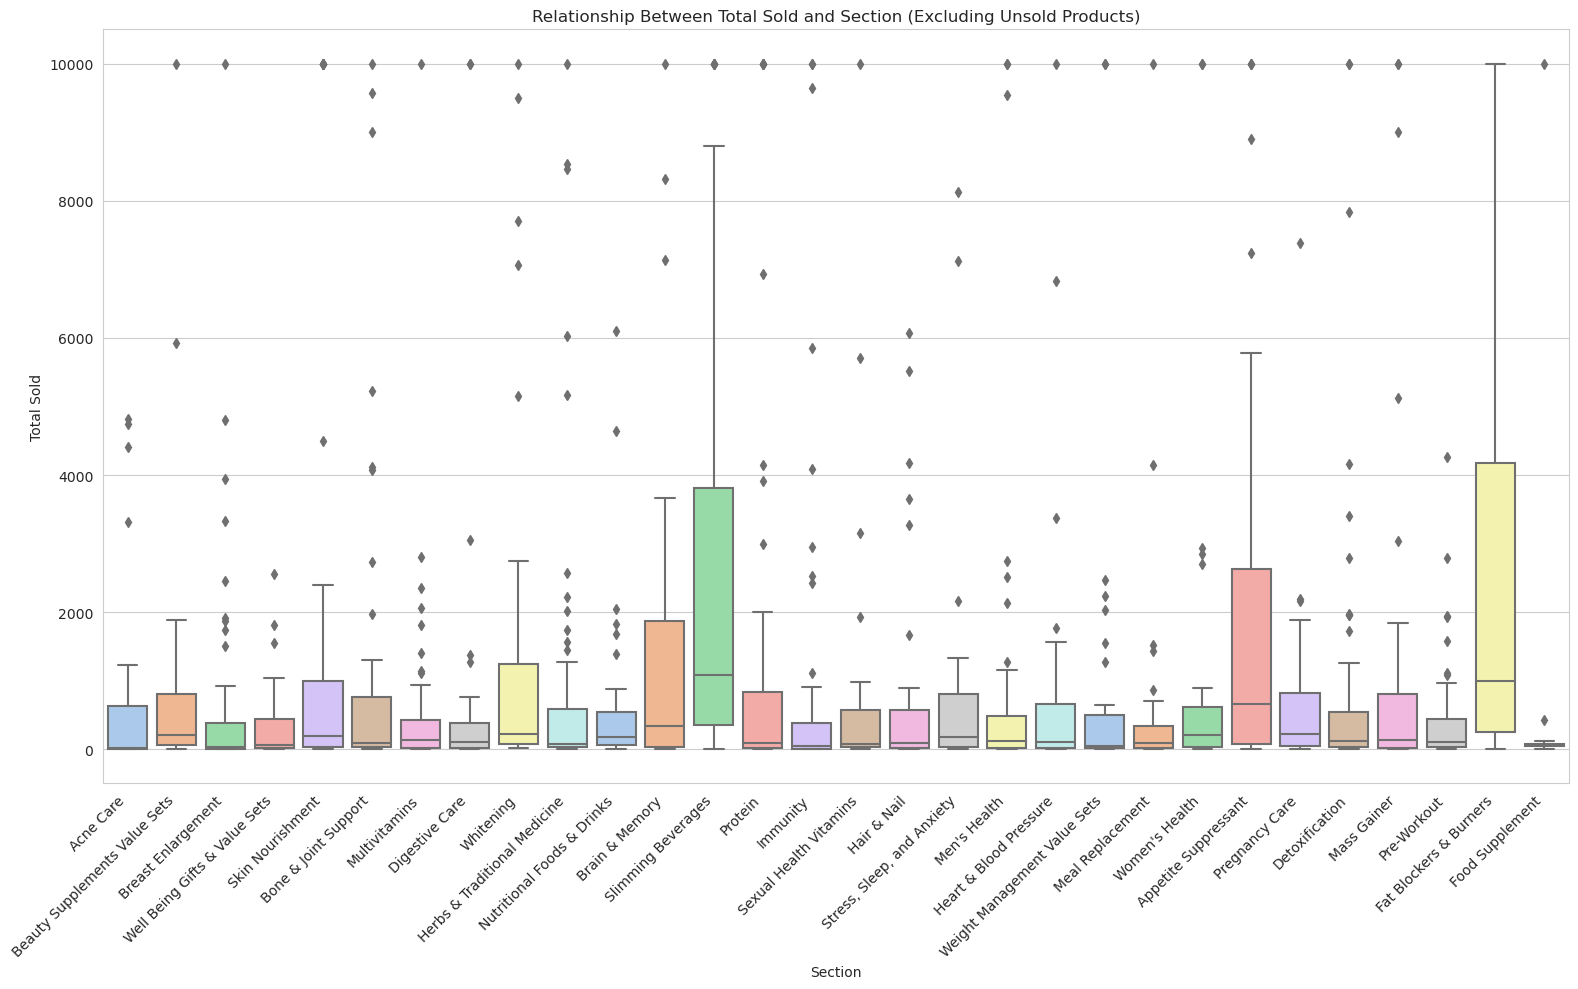

In [23]:
# Filtering out unsold products
sold_products_data = data[data['Total Sold'] > 0]

# Plotting the relationship between 'Total Sold' and 'Section' for sold products
plt.figure(figsize=(16, 10))
sns.boxplot(x='Section', y='Total Sold', data=sold_products_data, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Relationship Between Total Sold and Section (Excluding Unsold Products)')
plt.xlabel('Section')
plt.ylabel('Total Sold')
plt.tight_layout()
plt.show()

The boxplot illustrates the relationship between 'Total Sold' and 'Section' for products that have made sales.

From the plot, we can observe the following:

- Sales volumes differ across sections, as shown by the median and interquartile range. Some sections display a wide sales volume range, whereas others maintain consistency.
- Numerous sections exhibit sales outliers, indicating certain products within these sections have notably higher sales than others.
- "Slimming Beverages", "Fat Blockers & Burners" and "Appetite Suppressant" sections register high sales, with certain products distinctly surpassing others in sales.

# Conclusion
The exploratory data analysis (EDA) of the Lazada health and wellness products dataset has provided insights into product distribution, price dynamics, top locations, and relationships between sales, reviews, and pricing.

Key insights include:

- **Bangkok's Dominance**: As expected from the earlier analyses, Bangkok stands out with the highest total sales count, reinforcing its role as a significant market for health and wellness products on Lazada.
- **Variability Across Locations**: Different locations have varying sales volumes. After Bangkok, locations such as "Nonthaburi", "Pathum Thani", and "Khon Kaen" also show substantial sales counts.
- **Unsold Products**: In several sections, unsold products tend to be priced higher than sold products. This could suggest that price sensitivity plays a role in sales.
- **Outliers**: There are several outliers in the price distribution, especially for sold products. These could be premium or specialized products.
- **Top Performers**: Sections like "Slimming Beverages", "Fat Blockers & Burners" and "Appetite Suppressant" show high sales volumes with several products significantly outperforming others.
    
Note: While the dataset provides an overview of the products within the health and wellness category on Lazada, a more in-depth analysis would benefit from additional information.